sources



1 Additional feature to analyse:
Methane levels 800k years
sea ice coverage 
total solar irradiance


read up:

Lead and lags: https://cp.copernicus.org/preprints/cp-2017-71/cp-2017-71.pdf

El Nino
Frequency analysis
Linear regression

Global GDP (https://ourworldindata.org/grapher/world-gdp-over-the-last-two-millennia?time=1900..latest)
Global population: (https://www.worldometers.info/world-population/world-population-by-year/)



FFT Function Fast Furier Transform for frequency analysis
https://www.youtube.com/watch?v=arYKpiVACvY
https://www.youtube.com/watch?v=sa7E9qUHYXw

Climate Change: Atmospheric Carbon Dioxide (https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)

CArbon Tracker video:(https://www.youtube.com/watch?v=I7jKxO4nKZc)

(check data from papers by Parrenin et al. 2013; Snyder et al. 2016, Bereiter et al. 2015)

IPCC report 2023:
https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_FullVolume.pdf

Citable Glossary : chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_AnnexesIndex.pdf

python:
Time series analysis and precidction: (https://www.youtube.com/watch?v=ilw2AnNsbIc)
Time series: (https://www.youtube.com/watch?v=huNTC4Zw2S8)



## set environment, import modules

In [2]:
import pandas as pd
# Successfully installed xlrd-2.0.1 - required install for operations with excel
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

### Import CO2_Luthi_et_al._2008_Nature (composite CO2) and EPICA Dome C Ice Core (Temperature)


In [3]:
#read in CO2 composit created in excel by lecturer

# Import Excel ref: https://datatofish.com/read_excel/
# skiprows: https://www.statology.org/pandas-read-excel-skip-rows/
dfCO2 = pd.read_excel("Data\CO2_Luthi_et_al._2008_Nature.xls", sheet_name="3.  Composite CO2", skiprows=6)
dfCO2.head()

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In [4]:
dfCO2.columns

Index(['EDC3_gas_a (yr)', 'CO2 (ppmv)'], dtype='object')

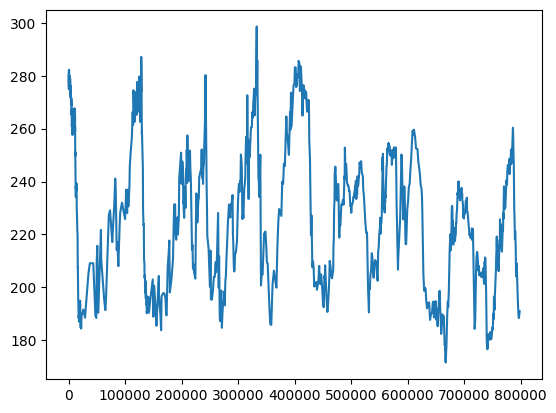

In [5]:
# plot escel Composit CO2 
plt.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'])

In [6]:
# read in temperature from original source "EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt" 

#read in text data separated with multiple spaces (ref: https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas)
dfTemperature = pd.read_csv('Data/EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt', sep='\s+', skiprows=91)
dfTemperature.head()

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN


In [7]:
dfTemperature.columns

Index(['Bag', 'ztop', 'Age', 'Deuterium', 'Temperature'], dtype='object')

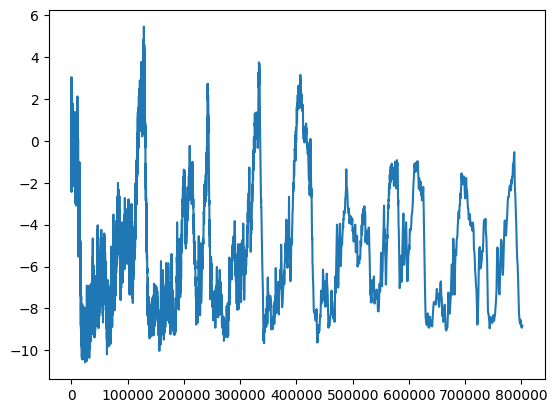

In [8]:
#plot temperature
plt.plot(dfTemperature['Age'],dfTemperature['Temperature'])

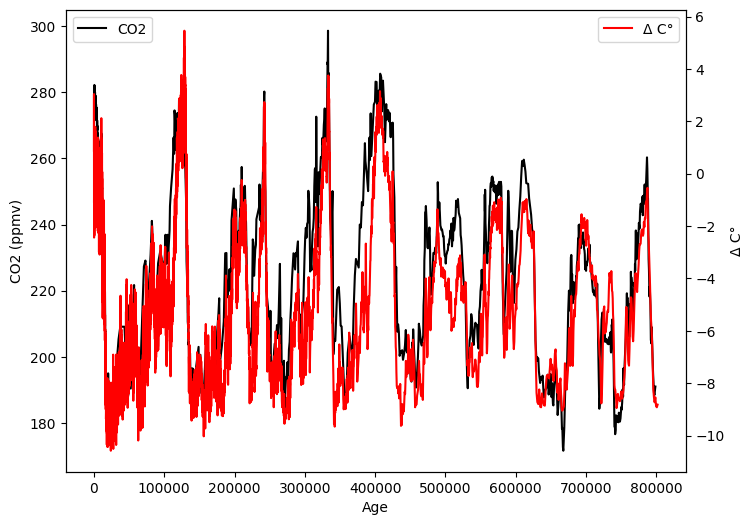

In [9]:
#Plot temperature and CO2 composit with dual y axis

#Dual axis (ref: https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/)

fig, ax1 = plt.subplots(figsize=(8,6))
ax2=ax1.twinx()


ax1.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'],color='black', label='CO2')
ax2.plot(dfTemperature['Age'],dfTemperature['Temperature'],color='r',label='Δ C°')
ax1.set_ylabel('CO2 (ppmv)')  # Set y-axis label
ax2.set_ylabel('Δ C°')  # Set y-axis label
ax1.set_xlabel('Age')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.legend()
plt.show()


#plt.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'])
#plt.plot(dfTemperature['Age'],dfTemperature['Temperature'],color='r')

#Verify composit CO2 data

In [10]:
# import individual source data for composit in CO2_Luthi_et_al._2008_Nature.xls created by lecturer Brian McGinley

# Import specific range of Excel in Python (ref: https://www.analytics-tuts.com/import-specific-range-of-excel-in-python/)

# Data collected and compiled into multiple ranges in one excel file by Lecturer: Brian McGinley
# Excel ranges point to columns: 'Gasage (EDC3, yr BP)' or equivalent & 'CO2 (ppmv)'

df_0_22 = pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='B,D',skiprows=6).dropna() # University of Bern, Dome C (0-22 kyr BP) - Monnin et al. (2001+2004)
df_0_440= pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='G,I',skiprows=6).dropna() # LGGE Grenoble, Vostok (0-440 kyr BP) - Petit et al. (1999), Pepin et al. (2001), Raynaud et al. (2005)
df_19_63= pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='K,L',skiprows=6).dropna() # University of Bern, Taylor Dome (19-63 kyr BP), Indermühle et al. (2000)
df_393_664=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='O,Q',skiprows=6).dropna() # University of Bern, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)
df_393_664_lgge=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='T,V',skiprows=6).dropna() # LGGE Grenoble, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)
df_611_800=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='X,Z',skiprows=6).dropna() # University of Bern, Dome C (611-800 kyr BP), Lüthi et al. (2008)
df_611_800_lgge=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AC,AE',skiprows=6).dropna() # LGGE Grenoble, Dome C (611-800 kyr BP), Lüthi et al. (2008)
df_35_68=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AI,AJ',skiprows=6).dropna() # University of Bern, Talos Dome (35-68 kyr BP), Bereiter et al. (2012)
df_49_115=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AM,AO',skiprows=6).dropna() # University of Bern, EDML (49-115 kyr BP), Bereiter et al. (2012) [1], Lüthi et al. (2010) [2]
df_19_88=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AS,AU',skiprows=6).dropna() # Oregon State University, Byrd (19-88 kyr BP), Ahn et al. (2008)
df_9_22=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AX,AZ',skiprows=6).dropna() # LGGE Grenoble, Byrd (19-88 kyr BP), Lourantou et al. (2010, a) (Global Biogeochemical Cycles)
df_125_153=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BC,BE',skiprows=6).dropna() # LGGE Grenoble, EDC (125- 153 kyr BP), Lourantou et al. (2010, b) (Quaternary Science Reviews)
df_12_24=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BH,BJ',skiprows=6).dropna() # University of Bern, EDC (12-24 kyr BP), Schmitt et al. (2011)
df_105_155=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BM,BO',skiprows=6).dropna() # University of Bern, EDC (105-155 kyr BP), Schneider et al. (2013)
df_0_2=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BQ,BR',skiprows=6).dropna() # CSIRO Australia, Law Dome (0-2 kyr BP), MacFarling Meure et al. (2006)
df_0_6=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BY,BZ',skiprows=6).dropna() # University of Bern, EDML (0-6 kyr BP), Monnin et al. (2004) [1], Siegenthaler et al. (2005) [2]
df_0_2_CSIRO2=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CF,CG',skiprows=6).dropna() # CSIRO Australia, Law Dome and South Pole (0-2 kyr BP), Rubino et al. (2013)
df_20_40=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CL,CM',skiprows=6).dropna() # Oregon State University, Siple Dome (20-40 kyr BP), Ahn et al. (2014, a) (Nature Communications)
df_7_9=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CP,CR',skiprows=6).dropna() # Oregon State University, Siple Dome (7.3 - 9 kyr BP), Ahn et al. (2014, b) (Geophysical Research Letters)
df_9_23=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CU,CV',skiprows=6).dropna() # Oregon State University, WAIS (9-23 kyr BP), Marcott et al. (2014)
df_560_806=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CY,CZ',skiprows=6).dropna() # University of Bern, EDC (560-806 kyr, corrected for analytical bias), Bereiter et al. (2014)

#df_9_23.tail()

In [11]:
# create my own composit (Python Composit vs Excel composit)
#concatenate dataframes into one composit - Python composit
dataframes = [df_0_22, df_0_440, df_19_63, df_393_664, df_393_664_lgge, df_611_800, df_611_800_lgge, df_35_68, df_49_115,
df_19_88,df_9_22,df_125_153,df_12_24,df_105_155,df_0_2,df_0_6,df_0_2_CSIRO2,df_20_40,df_7_9,df_9_23,df_560_806,]

PythonComposit_df = pd.DataFrame()

for df in dataframes:
    df.columns = ['Age', 'CO2']
    PythonComposit_df = pd.concat([PythonComposit_df, df], axis=0, ignore_index=True)

PythonComposit_df = PythonComposit_df.sort_values(by='Age')
#len(dataframes)#check if I have them all

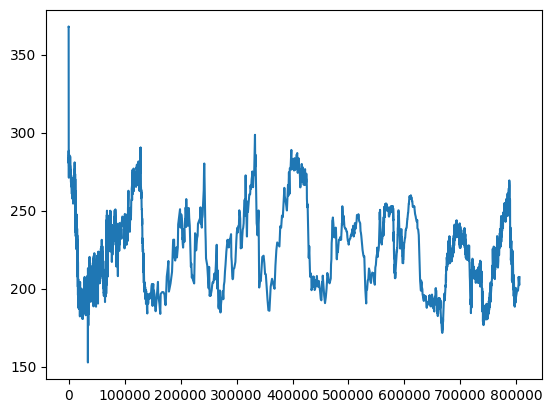

In [12]:
plt.plot(PythonComposit_df['Age'],PythonComposit_df['CO2'])

This includes modern data and matches paper: Climate Change: Atmospheric Carbon Dioxide (https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)

In [13]:
dfCO2_compo = pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="CO2 Composite", skiprows=14) # composit created in Excel by lecturer Brian McGinley
dfCO2_compo.columns

Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')

In [74]:
dfCO2_compo['Gasage (yr BP) '].min()
dfTemperature['Age'].min()

-50.0

In [ ]:
# folytatas az összefűzött plottal

linecolors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5", 
    "#ad494a"
]


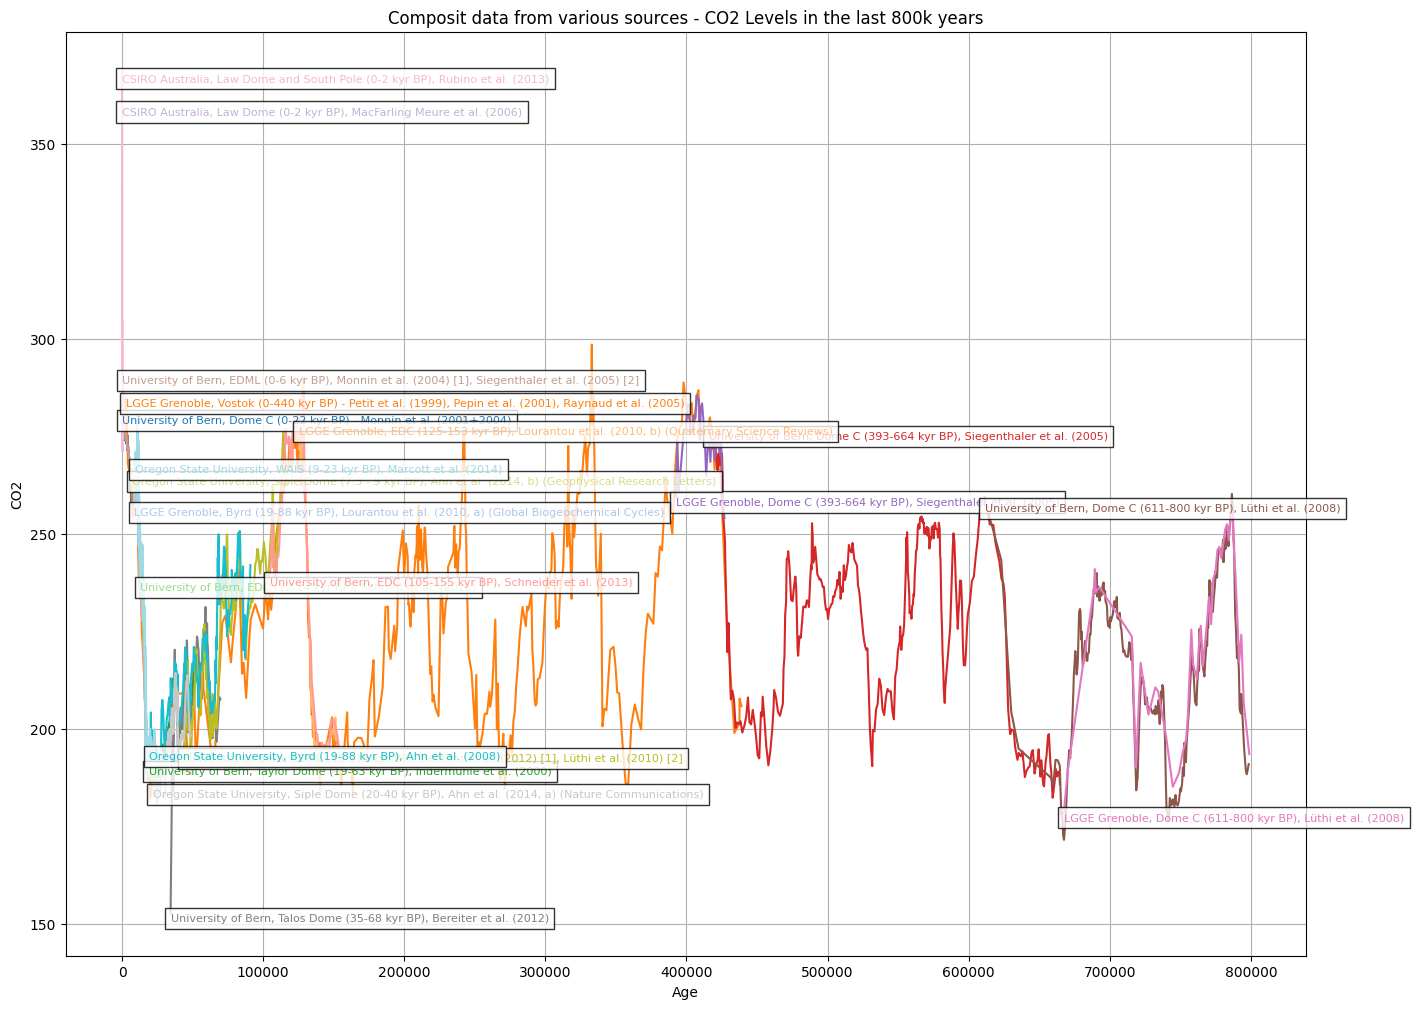

In [23]:
# List of dataframes
dataframes = [df_0_22, df_0_440, df_19_63, df_393_664, df_393_664_lgge, df_611_800, df_611_800_lgge, df_35_68, df_49_115,
              df_19_88, df_9_22, df_125_153, df_12_24, df_105_155, df_0_2, df_0_6, df_0_2_CSIRO2, df_20_40, df_7_9, df_9_23, df_560_806]

#labels = ["df_0_22", "df_0_440", "df_19_63", "df_393_664", "df_393_664_lgge", "df_611_800", "df_611_800_lgge", "df_35_68",
#          "df_49_115", "df_19_88", "df_9_22", "df_125_153", "df_12_24", "df_105_155", "df_0_2", "df_0_6", "df_0_2_CSIRO2",
#          "df_20_40", "df_7_9", "df_9_23", "df_560_806"]

# List of sources
labels = [
    "University of Bern, Dome C (0-22 kyr BP) - Monnin et al. (2001+2004)",
    "LGGE Grenoble, Vostok (0-440 kyr BP) - Petit et al. (1999), Pepin et al. (2001), Raynaud et al. (2005)",
    "University of Bern, Taylor Dome (19-63 kyr BP), Indermühle et al. (2000)",
    "University of Bern, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)",
    "LGGE Grenoble, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)",
    "University of Bern, Dome C (611-800 kyr BP), Lüthi et al. (2008)",
    "LGGE Grenoble, Dome C (611-800 kyr BP), Lüthi et al. (2008)",
    "University of Bern, Talos Dome (35-68 kyr BP), Bereiter et al. (2012)",
    "University of Bern, EDML (49-115 kyr BP), Bereiter et al. (2012) [1], Lüthi et al. (2010) [2]",
    "Oregon State University, Byrd (19-88 kyr BP), Ahn et al. (2008)",
    "LGGE Grenoble, Byrd (19-88 kyr BP), Lourantou et al. (2010, a) (Global Biogeochemical Cycles)",
    "LGGE Grenoble, EDC (125-153 kyr BP), Lourantou et al. (2010, b) (Quaternary Science Reviews)",
    "University of Bern, EDC (12-24 kyr BP), Schmitt et al. (2011)",
    "University of Bern, EDC (105-155 kyr BP), Schneider et al. (2013)",
    "CSIRO Australia, Law Dome (0-2 kyr BP), MacFarling Meure et al. (2006)",
    "University of Bern, EDML (0-6 kyr BP), Monnin et al. (2004) [1], Siegenthaler et al. (2005) [2]",
    "CSIRO Australia, Law Dome and South Pole (0-2 kyr BP), Rubino et al. (2013)",
    "Oregon State University, Siple Dome (20-40 kyr BP), Ahn et al. (2014, a) (Nature Communications)",
    "Oregon State University, Siple Dome (7.3 - 9 kyr BP), Ahn et al. (2014, b) (Geophysical Research Letters)",
    "Oregon State University, WAIS (9-23 kyr BP), Marcott et al. (2014)",
    "University of Bern, EDC (560-806 kyr, corrected for analytical bias), Bereiter et al. (2014)"
]

linecolors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5"
]

plt.figure(figsize=(16, 12))

for df, label, color in zip(dataframes, labels, linecolors):
    plt.plot(df.iloc[:, 0], df.iloc[:, 1], label=label, color=color)
# add labels
    plt.text(df.iloc[0, 0], df.iloc[0, 1], label, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8), color=color)

plt.xlabel('Age')
plt.ylabel('CO2')
plt.title('Composit data from various sources - CO2 Levels in the last 800k years')
plt.grid(True)
plt.show()



In [15]:
# read in reference global temperature from original source "temperature_Arc-HalletLake.McKay.2008.txt" 

#read in text data separated with multiple spaces (ref: https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas)
dfRefTemperature = pd.read_csv('Data/temperature_Arc-HalletLake.McKay.2008.txt', sep='\s+', skiprows=222)
dfRefTemperature.head()

,year,uncertainty_temperatureduration,thickness,age,temperature,BSi
2005.103134,0.960666,1.795267,0.25,-55.103134,3.037326,15.554514
2003.304797,0.960120,1.801401,0.25,-53.304797,3.031934,15.535011
2001.500338,0.900791,1.807513,0.25,-51.500338,2.436463,13.501564
1999.689776,0.800537,1.813604,0.25,-49.689776,1.275921,10.146699
1997.873136,0.765954,1.819673,0.25,-47.873136,0.603854,8.515482


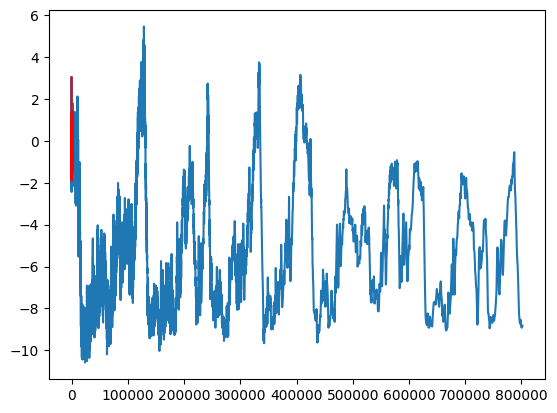

In [20]:
# A global database of Holocene paleotemperature records ref: https://www.nature.com/articles/s41597-020-0445-3

plt.plot(dfTemperature['Age'],dfTemperature['Temperature'])#EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt
plt.plot(dfRefTemperature['age'],dfRefTemperature['temperature'],color="r") #temperature_Arc-HalletLake.McKay.2008.txt

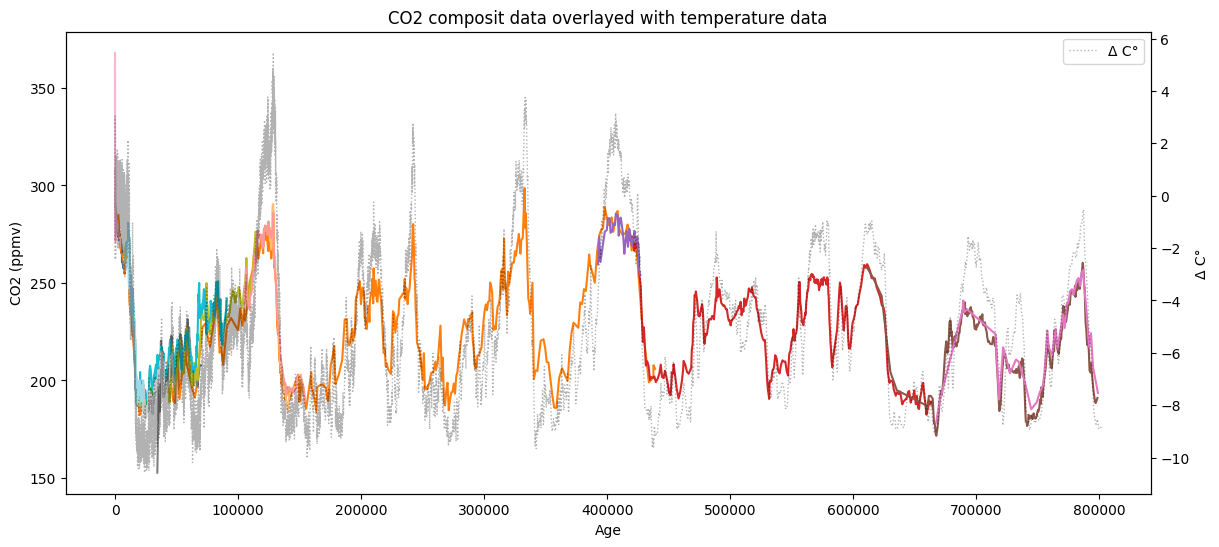

In [69]:
linecolors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5", "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5"]

fig, ax2 = plt.subplots(figsize=(14, 6))
ax1 = ax2.twinx()

# ax1.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'], color='black', label='CO2')
ax1.plot(dfTemperature['Age'], dfTemperature['Temperature'], color='black', label='Δ C°', alpha=0.3, lw=1,linestyle=':')
ax2.set_ylabel('CO2 (ppmv)')  # Set y-axis label
ax1.set_ylabel('Δ C°')  # Set y-axis label
ax2.set_xlabel('Age')


for df, label, color in zip(dataframes, labels, linecolors):
    ax2.plot(df.iloc[:, 0], df.iloc[:, 1], color=color)
    # add labels
    #ax2.text(df.iloc[0, 0], df.iloc[0, 1], label, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8), color=color)
ax1.legend(loc='upper right')
#ax2.legend(loc='upper left')
plt.title("CO2 composit data overlayed with temperature data")
plt.show()


check: https://www.youtube.com/watch?v=huNTC4Zw2S8
https://www.youtube.com/watch?v=ilw2AnNsbIc&t=1487s